In [1]:
### import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("car data.csv")                                              ### dataset loading

In [3]:
### dataset analyzing
print("SHAPE:",    df.shape)
print("COLUMNS:",  df.columns)
print("HEAD:",     df.head())
print("DESCRIBE:", df.describe())

SHAPE: (301, 9)
COLUMNS: Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')
HEAD:   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
DESCRIBE:               Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()                                                    ### to find null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

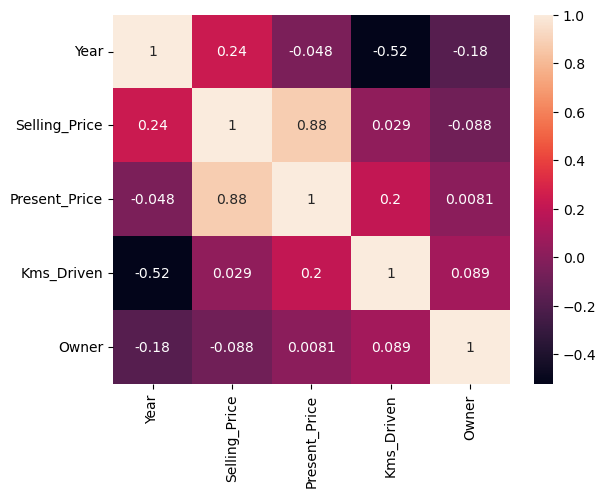

In [6]:
##HEATMAP
CORR=df.corr()
sns.heatmap(CORR, annot=True)

In [7]:
### Encoding the Categorical Data(letter ------> 0's&1's)
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)         
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)            
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)      

In [12]:
#df.head()

<AxesSubplot:>

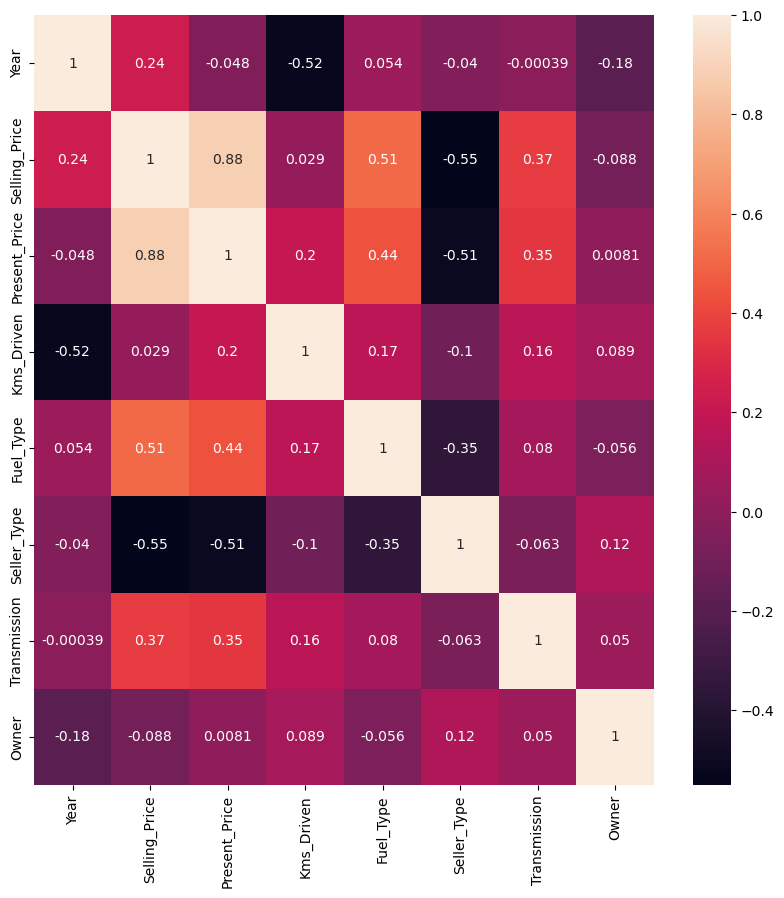

In [9]:
### dataset visualization
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True)

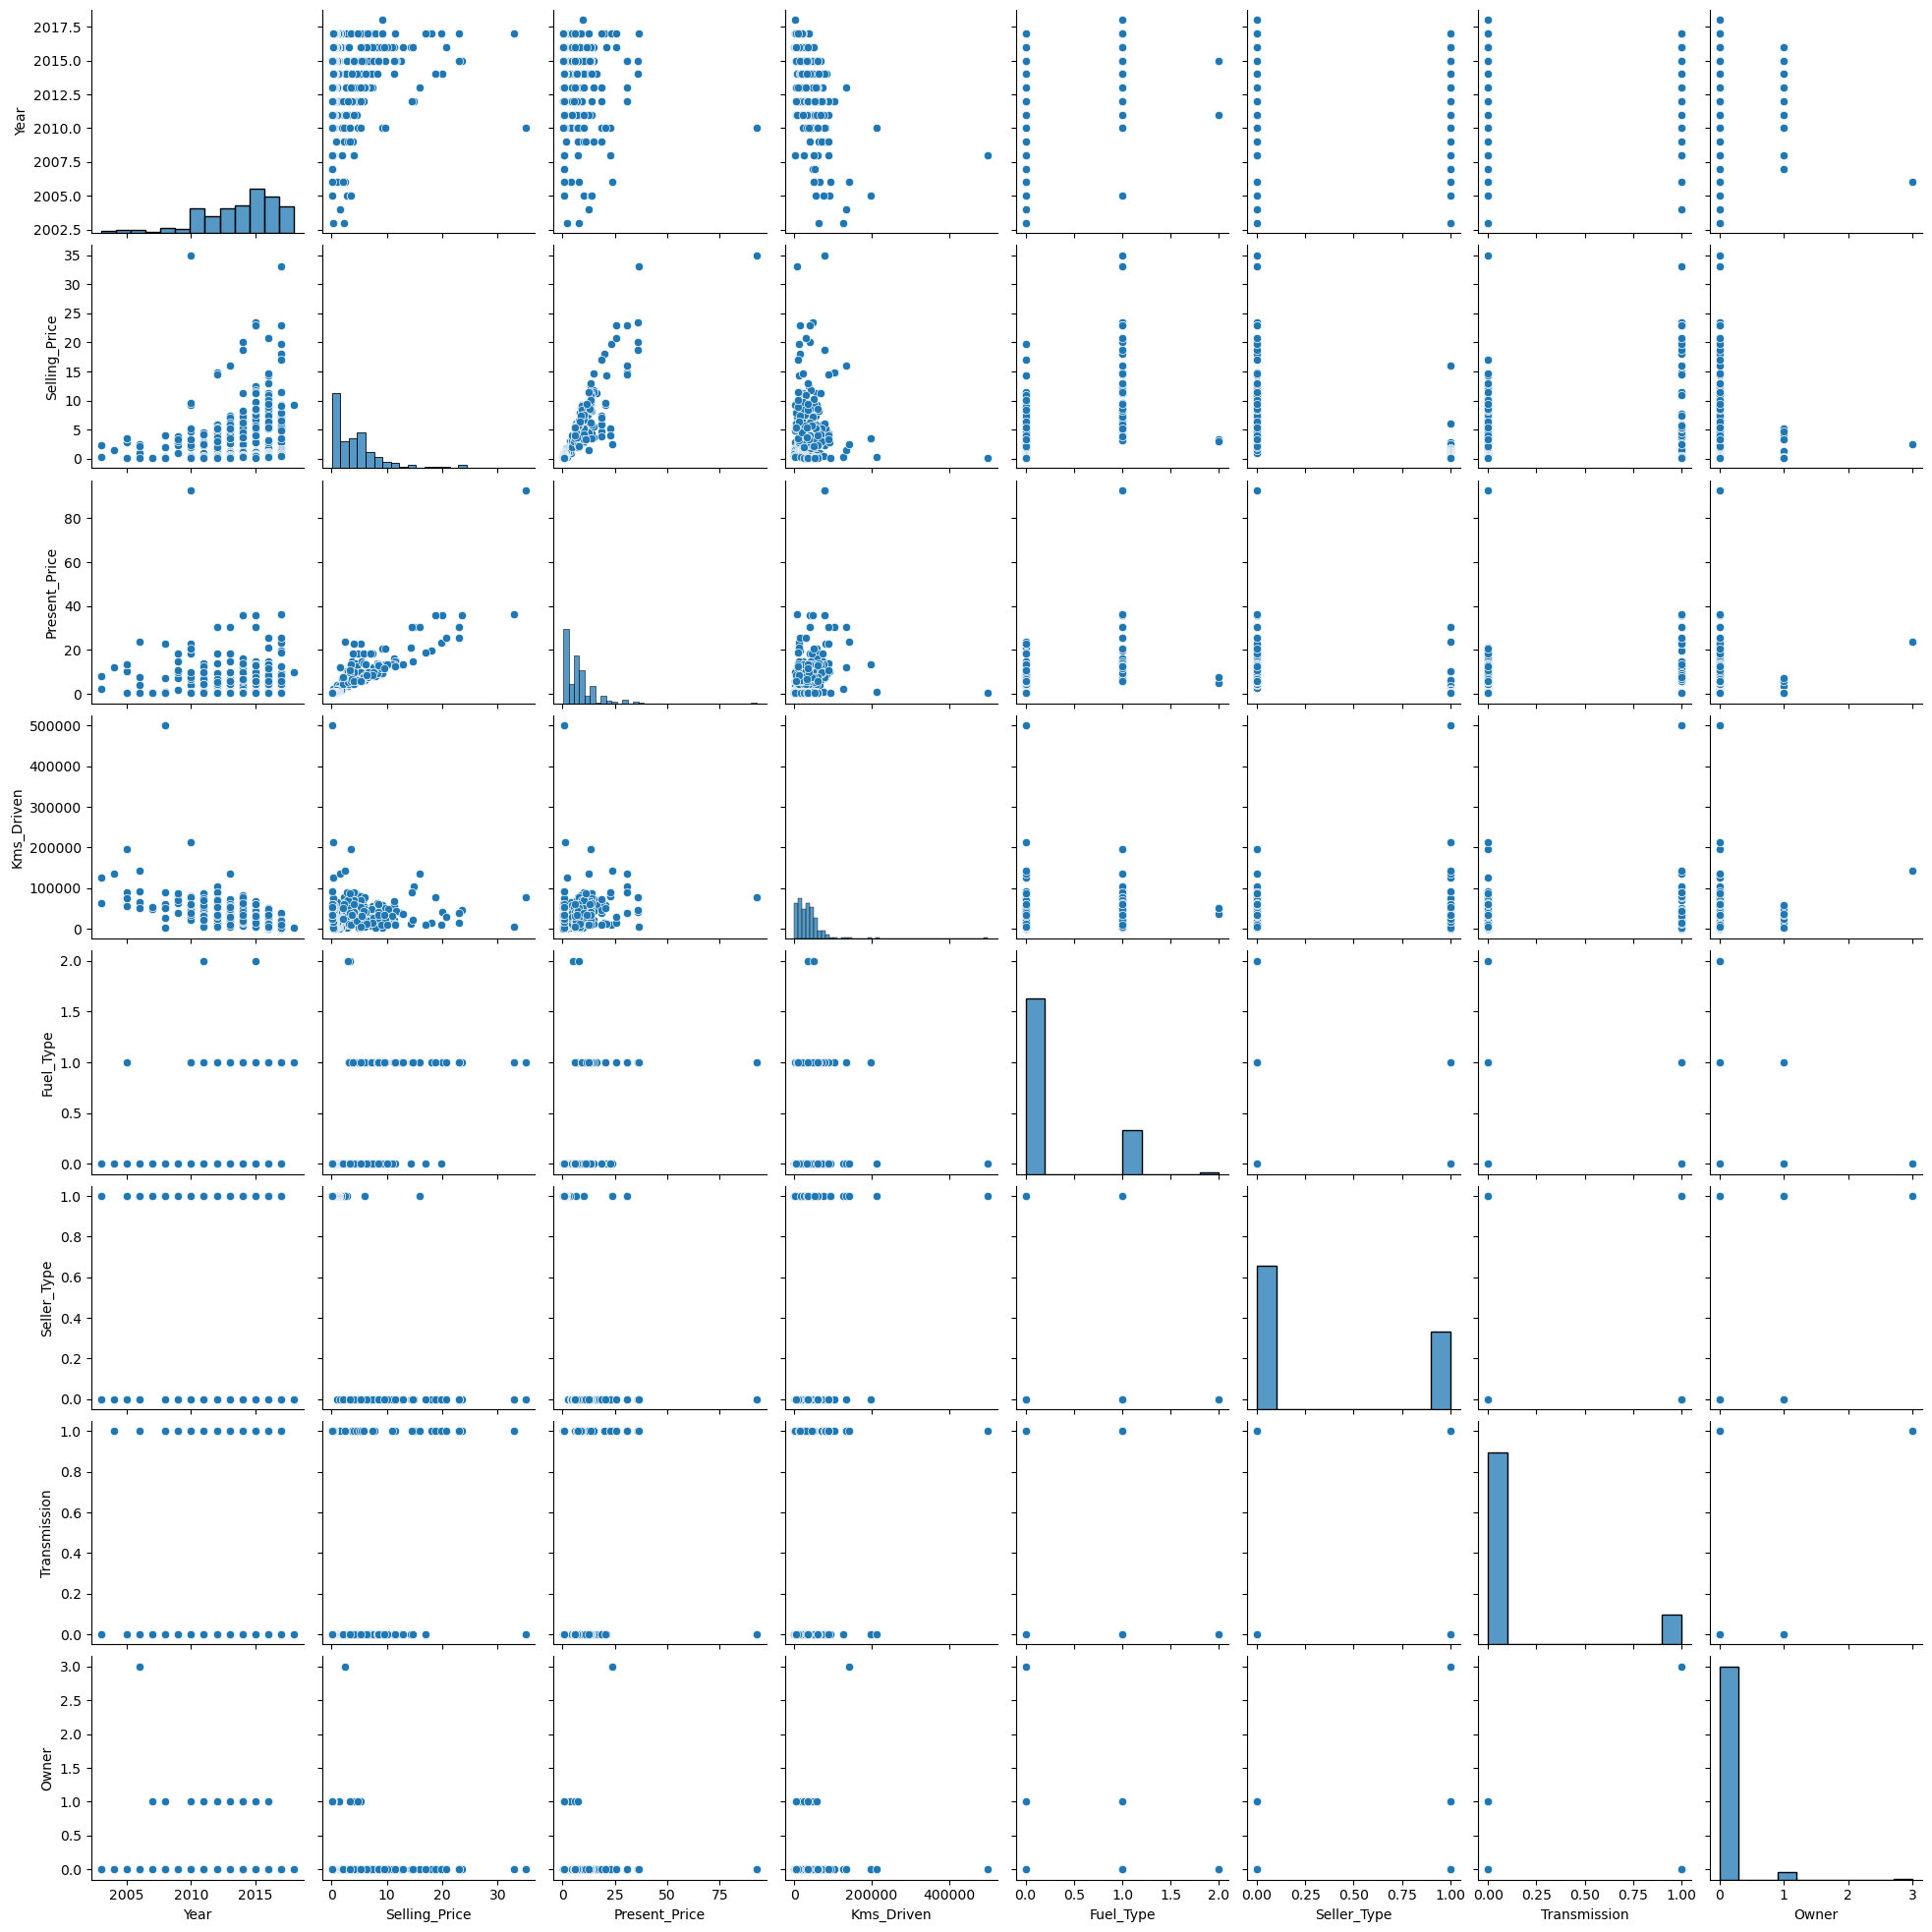

In [10]:
sns.pairplot(df)

In [11]:
### Splitting the data and Target
y=df["Selling_Price"]
x=df.drop(["Selling_Price","Car_Name"], axis=1)

In [12]:
from sklearn.model_selection import train_test_split                            ### train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [13]:
from sklearn.metrics import r2_score
##REGRESSION ALGORITHMS
from sklearn.linear_model import LinearRegression             #1
from sklearn.linear_model import Lasso                        #2
from sklearn.ensemble import RandomForestRegressor            #3        
from sklearn.tree import DecisionTreeRegressor                #4
from xgboost import XGBRegressor                              #5

In [14]:
#1. Linear Regression.1                                                        (### Model Training)
m1 = LinearRegression()

m1.fit(xtrain, ytrain)
m1TrPRED = m1.predict(xtrain)                       #Model Evaluation with training data

score = r2_score(ytrain, m1TrPRED)                  ### R squared Error  
print(score)

0.8838169193709794


In [15]:
m1TePRED = m1.predict(xtest)                       #Model Evaluation with test data

score = r2_score(ytest, m1TePRED)                  ### R squared Error  
print(score)

0.8401532365377683


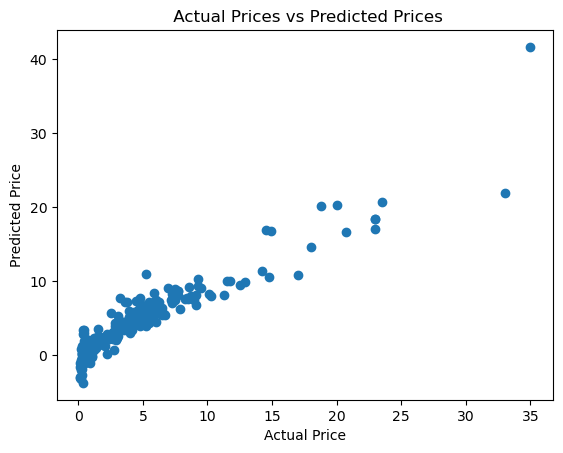

In [16]:
#Visualize the actual prices and Predicted prices
plt.scatter(ytrain, m1TrPRED)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

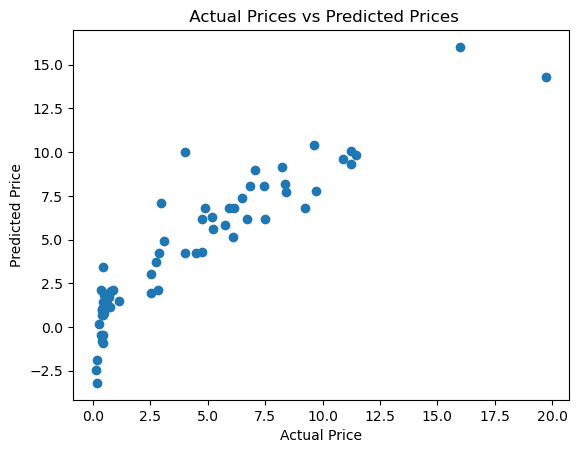

In [17]:
plt.scatter(ytest, m1TePRED)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [18]:
#2. Lasso.2                                                      
m2 = Lasso()

m2.fit(xtrain, ytrain)
m2TrPRED = m2.predict(xtrain)                                  

score = r2_score(ytrain, m2TrPRED)                                          
print(score)

0.8435873952582833


In [19]:
m2TePRED = m2.predict(xtest)                                     

score = r2_score(ytest, m2TePRED)                                            
print(score)

0.8497457570738542


In [20]:
#3. RandomForestRegressor.3                                              
m3 = RandomForestRegressor()

m3.fit(xtrain, ytrain)
m3TrPRED = m3.predict(xtrain)                            

score = r2_score(ytrain, m3TrPRED)                                             
print(score)

0.9871246653268007


In [21]:
m3TePRED = m3.predict(xtest)                                  

score = r2_score(ytest, m3TePRED)                                            
print(score)

0.9615201748515566


In [22]:
#4. DecisionTreeRegressor.4                                              
m4 = DecisionTreeRegressor()

m4.fit(xtrain, ytrain)
m4TrPRED = m4.predict(xtrain)                                

score = r2_score(ytrain, m4TrPRED)                                           
print(score)

1.0


In [23]:
m4TePRED = m4.predict(xtest)                                   

score = r2_score(ytest, m4TePRED)                                            
print(score)

0.9299760768010435


In [24]:
#5. XGBRegressor.5                                                
m5 = XGBRegressor()

m5.fit(xtrain, ytrain)
m5TrPRED = m5.predict(xtrain)                                   

score = r2_score(ytrain, m5TrPRED)                                              
print(score)

0.999993719246304


In [25]:
m5TePRED = m5.predict(xtest)                                    

score = r2_score(ytest, m5TePRED)                                          
print(score)

0.9489683416417547


In [26]:
####training data r2_score:-
#-----------------------------------------------------------------------------------------------------
#1.LinearRegression - 0.88          
#2.Lasso - 0.84                     
#3.RandomForestRegressor - 0.98                   
#4.DecisionTreeRegressor - 1.0               
#5.XGBRegressor - 0.99                             

In [27]:
####test data r2_score:-
#------------------------------------------------------------------------------------------------------
#1.LinearRegression - 0.84           
#2.Lasso - 0.84                       
#3.RandomForestRegressor - 0.96                   
#4.DecisionTreeRegressor - 0.92               
#5.XGBRegressor - 0.94